<시작하세요! 텐서플로 2.0 프로그래밍> 예제코드입니다.

- 예제 코드를 실행하기 위해서는 [파일] > [드라이브에 사본 저장]으로 본인의 계정에 사본을 만든 다음 실행하면 됩니다.
- 예제 코드는 [깃허브 저장소](https://github.com/wikibook/tf2)에서도 동일하게 제공됩니다. 예제에 대한 질문이나 책에 대한 질문은 깃허브 저장소의 [Issues](https://github.com/wikibook/tf2/issues)에 올려주세요.
- 각 장의 예제 파일은 처음부터 끝까지 실행하는 상황을 가정하고 작성되었습니다. 혹시 세션이 다운되는 등의 이유로 실행이 되지 않는 경우가 있다면, 필요한 라이브러리를 import 하신 후에 실행하시면 됩니다. (tensorflow, numpy, pandas 등)

In [ ]:
# 텐서플로 2 버전 선택
try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass
import tensorflow as tf

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


# 6.2 주요 레이어 정리

15922/15922 [==============================] - 0s 0us/step


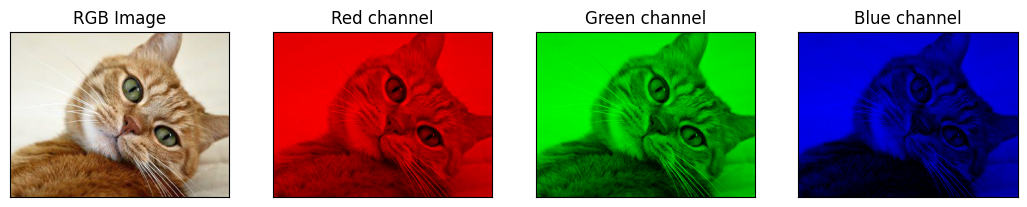

In [ ]:
import tensorflow as tf
# 그림 6.8 출력 코드. 참고 링크 : https://stackoverflow.com/a/37435090/2689257
import matplotlib.pyplot as plt

image_path = tf.keras.utils.get_file('cat.jpg', 'http://bit.ly/33U6mH9')
image = plt.imread(image_path)

titles = ['RGB Image', 'Red channel', 'Green channel', 'Blue channel']
cmaps = [None, plt.cm.Reds_r, plt.cm.Greens_r, plt.cm.Blues_r]

from numpy import array, zeros_like
def channel(image, color): #해당 칼러를 추출
    if color not in (0, 1, 2): return image
    c = image[..., color]
    z = zeros_like(c)
    return array([(c, z, z), (z, c, z), (z, z, c)][color]).transpose(1,2,0)
  
colors = range(-1, 3)
fig, axes = plt.subplots(1, 4, figsize=(13,3))
objs = zip(axes, titles, colors)
for ax, title, color in objs:
    ax.imshow(channel(image, color))
    ax.set_title(title)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

c = image[..., color]는 이미지에서 해당 색상 채널을 추출하는 코드

여기서 ...은 전체 이미지를 의미
color는 해당 채널을 선택하는 인덱스 값 
0은 빨간색, 1은 초록색, 2는 파란색

따라서 image[..., color]는 이미지에서 해당 색상 채널을 추출하여 c 변수에 저장하는 것을 의미 
c 변수가 해당 색상 채널의 값을 가지고 있으므로, 이를 기반으로 색상 채널 이미지를 생성

...은 Python의 확장 문법인 Ellipsis(생략 기호)
이 기호는 Numpy와 같은 다차원 배열에서 특정 차원의 인덱스를 생략하고 전체 차원에 대한 슬라이싱을 지정할 때 사용

 -> 예를 들어, a[..., 1]은 배열 a의 두 번째 차원의 인덱스가 1인 모든 요소를 선택하는 것을 의미 , a[:, :, 1]과 동일

...은 일반적으로 배열의 차원 수가 불명확한 경우에 사용

 -> 예를 들어, 3차원 배열에서 a[..., 1]과 a[:, :, 1]은 동일한 결과를 반환하지만, 4차원 배열에서는 a[..., 1]이 4차원 배열의 두 번째 차원을 기준으로 선택하는 반면, a[:, :, 1]은 3차원 배열에서 두 번째 차원을 선택하는 것과 동일.

return array([(c, z, z), (z, c, z), (z, z, c)][color]).transpose(1,2,0)는 입력 
이미지에서 선택된 채널에 해당하는 색상 채널 이미지를 생성하여 반환하는 코드

여기서, (c, z, z)는 빨간색 채널을 선택할 때, (z, c, z)는 초록색 채널을 선택할 때, (z, z, c)는 파란색 채널을 선택할 때 해당하는 튜플

즉, 선택된 색상 채널에 해당하는 튜플을 선택한 후 array 함수를 사용하여 배열로 변환하고, transpose 함수를 사용하여 배열의 축을 변경하여 RGB 순서로 변경

 -> 예를 들어, 만약 color가 0이라면 (c, z, z)가 선택되므로 빨간색 채널의 값을 사용하여 (R, 0, 0) 형태의 이미지를 만들게 된다. 이 이미지는 원본 이미지에서 빨간색 채널만 추출한 것

In [10]:
# 6.1 Conv2D 레이어 생성 코드 - 필터는 가중치값의 행렬
conv1 = tf.keras.layers.Conv2D(kernel_size=(3,3),strides=(2,2),padding='valid' ,filters=16)
# 필터가 합성곱층의 가중치 파라미터 W에 해당 > 학습단계에서 적절한 필터를 찾도록 학습 
# 파라미터를 알고 정하는 것이 중요

In [7]:
# 6.2 MaxPool2D 레이어 생성 코드 - 가중치가 없음  > 학습되지 않음
pool1 = tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2))

In [11]:
# 6.3 Dropout 레이어 생성 코드 - 가중치 없다 > 학습 없다 30프로 걷어냄
pool1 = tf.keras.layers.Dropout(rate=0.3)

# 6.3 Fashion MNIST with CNN

In [12]:
# http://taewan.kim/post/cnn/ > 컨볼루션 학습에 도움이 된다 
# https://wikidocs.net/62306
# https://89douner.tistory.com/57

# 6.4 Fashion MNIST 데이터셋 불러오기 및 정규화
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist
(train_X, train_Y), (test_X, test_Y) = fashion_mnist.load_data()

train_X = train_X / 255.0 # 정규화 (픽셀값)
test_X = test_X / 255.0

In [15]:
# 6.5 데이터를 채널을 가진 이미지 형태(3차원)으로 바꾸기
# reshape 이전
print(train_X.shape, test_X.shape)

train_X = train_X.reshape(-1, 28, 28, 1) # 흑백 채널 추가 - (60000, 28, 28, 1) 
test_X = test_X.reshape(-1, 28, 28, 1)
# print((train_X))

# reshape 이후
print(train_X.shape, test_X.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)
(60000, 28, 28, 1) (10000, 28, 28, 1)


test_X = test_X.reshape(-1, 28, 28, 1)는 test_X 배열의 shape를 (샘플 개수, 높이, 너비, 채널 수) 형태로 변경하는 코드입.

여기서 -1은 자동으로 계산되는 축. 

따라서, test_X 배열의 첫 번째 차원의 크기(샘플 개수)에 따라 자동으로 나머지 차원의 크기가 결정.

이 코드에서는 test_X 배열의 첫 번째 차원의 크기가 자동으로 계산되고, 나머지 차원의 크기는 28, 28, 1로 지정. 

이렇게 함으로써 test_X 배열의 각 샘플은 28x28 크기의 흑백 이미지가 되고, 채널 수가 1인 3차원 배열로 표현.

train_X도 마찬가지로 test_X와 같은 방법으로 28x28 크기의 흑백 이미지가 되고, 채널 수가 1인 3차원 배열로 변경.

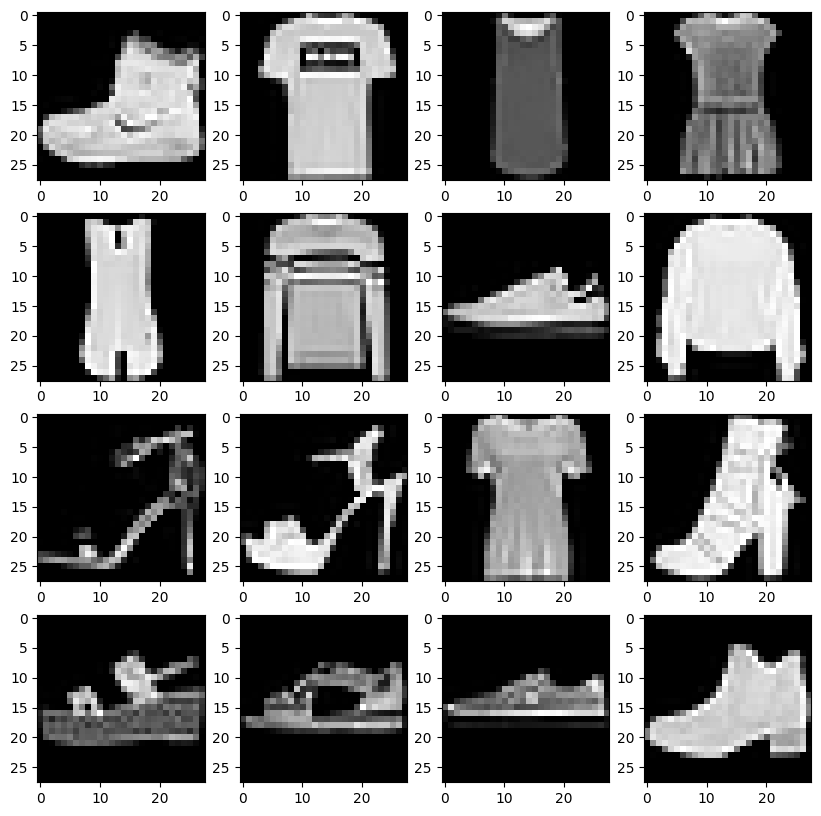

[9 0 0 3 0 2 7 2 5 5 0 9 5 5 7 9]


In [17]:
# 6.6 데이터 확인
import matplotlib.pyplot as plt
# 전체 그래프의 사이즈를 width=10, height=10 으로 지정합니다.
plt.figure(figsize=(10, 10))
for c in range(16):
    # 4행 4열로 지정한 grid 에서 c+1 번째의 칸에 그래프를 그립니다. 1~16 번째 칸을 채우게 됩니다.
    plt.subplot(4,4,c+1) # grid(4,4)에서 위 > 아래, 왼쪽 > 오른쪽 순서로 
    plt.imshow(train_X[c].reshape(28,28), cmap='gray') # reshape(28,28)로 3차원 데이터를 다시 2차원 데이터로 변환후 출력
    
plt.show()

# train 데이터의 첫번째 ~ 16번째 까지의 라벨을 프린트합니다.
print(train_Y[:16]) # y 분류번호

In [19]:
# 6.7 Fashion MNIST 분류 컨볼루션 신경망 모델 정의
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(28,28,1), kernel_size=(3,3), filters=16),# input_shape(28,28,1)은 이미지 높이, 너비, 채널 수
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=32),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=64),
    tf.keras.layers.Flatten(),# 다차원 데이터를 1차원으로 정렬 
    tf.keras.layers.Dense(units=128, activation='relu'), # 분류기 // 활성화 함수가 들어가면 분류인가 회귀 인가에 따라 달라짐.
    tf.keras.layers.Dense(units=10, activation='softmax') # 분류기 // 대표적인 분류에 쓰이는 활성화 함수. 
])
# 경사하강법, 손실함수 
model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 conv2d_6 (Conv2D)           (None, 24, 24, 32)        4640      
                                                                 
 conv2d_7 (Conv2D)           (None, 22, 22, 64)        18496     
                                                                 
 flatten_1 (Flatten)         (None, 30976)             0         
                                                                 
 dense_2 (Dense)             (None, 128)               3965056   
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 3,989,642
Trainable params: 3,989,642
No

In [20]:
# 6.8 Google Colab GPU 사양 확인
!nvidia-smi

Wed Apr 26 07:17:12 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   58C    P0    30W /  70W |    439MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

Epoch 1/25
1407/1407 [==============================] - 19s 6ms/step - loss: 0.4674 - accuracy: 0.8339 - val_loss: 0.3897 - val_accuracy: 0.8637
Epoch 2/25
1407/1407 [==============================] - 8s 5ms/step - loss: 0.3388 - accuracy: 0.8777 - val_loss: 0.3747 - val_accuracy: 0.8673
Epoch 3/25
1407/1407 [==============================] - 8s 6ms/step - loss: 0.2872 - accuracy: 0.8923 - val_loss: 0.3651 - val_accuracy: 0.8695
Epoch 4/25
1407/1407 [==============================] - 9s 6ms/step - loss: 0.2448 - accuracy: 0.9072 - val_loss: 0.4148 - val_accuracy: 0.8709
Epoch 5/25
1407/1407 [==============================] - 7s 5ms/step - loss: 0.2109 - accuracy: 0.9234 - val_loss: 0.4174 - val_accuracy: 0.8721
Epoch 6/25
1407/1407 [==============================] - 8s 5ms/step - loss: 0.1865 - accuracy: 0.9312 - val_loss: 0.4569 - val_accuracy: 0.8661
Epoch 7/25
1407/1407 [==============================] - 8s 6ms/step - loss: 0.1647 - accuracy: 0.9388 - val_loss: 0.6106 - val_accuracy

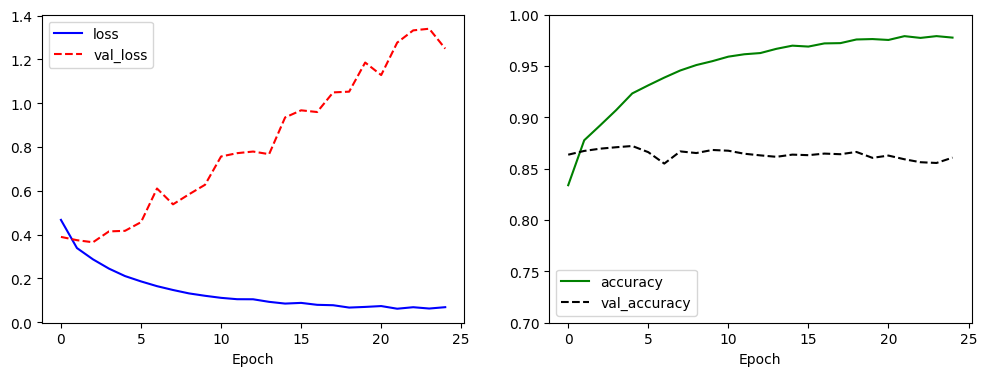

[1.2814685106277466, 0.8604999780654907]

In [21]:
# 6.9 Fashion MNIST 분류 컨볼루션 신경망 모델 학습
history = model.fit(train_X, train_Y, epochs=25, validation_split=0.25)

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

# 손실 그래프 - val_loss는 증가하는 과적합 형태 보임
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
# 검증 정확도 val_accuracy는 학습이 진행될수록 감소 
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()
# 첫째 결과가 테스트 데이터의 loss, 두번째 결과가 테스트 데이터의 accuracy
model.evaluate(test_X, test_Y, verbose=0)

In [ ]:
# 6.10 Fashion MNIST 분류 컨볼루션 신경망 모델 정의 - 풀링 레이어, 드랍아웃 레이어 추가
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(28,28,1), kernel_size=(3,3), filters=32),
    tf.keras.layers.MaxPool2D(strides=(2,2)), # stride를 증가시킴
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=64),
    tf.keras.layers.MaxPool2D(strides=(2,2)),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=128),
    tf.keras.layers.Flatten(),# flatten 레이어 파라미터수가 30976 > 1152로 감소
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dropout(rate=0.3),# 과적합 개선에 기여
    tf.keras.layers.Dense(units=10, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

model.summary()# 총 파라미터 숫자가 24만개로 감소

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 flatten_2 (Flatten)         (None, 1152)             

Epoch 1/25
1407/1407 [==============================] - 10s 5ms/step - loss: 0.5184 - accuracy: 0.8123 - val_loss: 0.3592 - val_accuracy: 0.8667
Epoch 2/25
1407/1407 [==============================] - 8s 5ms/step - loss: 0.3556 - accuracy: 0.8726 - val_loss: 0.3318 - val_accuracy: 0.8793
Epoch 3/25
1407/1407 [==============================] - 7s 5ms/step - loss: 0.3136 - accuracy: 0.8865 - val_loss: 0.3098 - val_accuracy: 0.8859
Epoch 4/25
1407/1407 [==============================] - 7s 5ms/step - loss: 0.2866 - accuracy: 0.8963 - val_loss: 0.3071 - val_accuracy: 0.8878
Epoch 5/25
1407/1407 [==============================] - 7s 5ms/step - loss: 0.2679 - accuracy: 0.9019 - val_loss: 0.2856 - val_accuracy: 0.8975
Epoch 6/25
1407/1407 [==============================] - 9s 6ms/step - loss: 0.2456 - accuracy: 0.9098 - val_loss: 0.3065 - val_accuracy: 0.8919
Epoch 7/25
1407/1407 [==============================] - 7s 5ms/step - loss: 0.2313 - accuracy: 0.9148 - val_loss: 0.2940 - val_accuracy

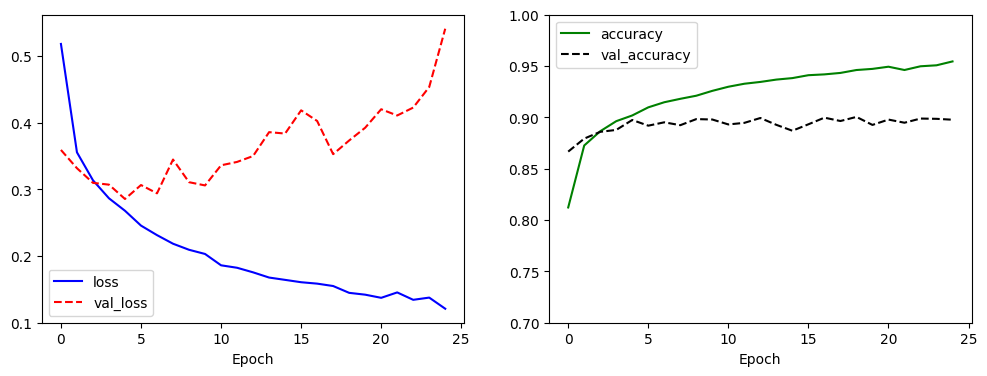

[0.5778385996818542, 0.8964999914169312]

In [ ]:
# 6.11 Fashion MNIST 분류 컨볼루션 신경망 모델 학습 - 풀링 레이어, 드랍아웃 레이어 추가
history = model.fit(train_X, train_Y, epochs=25, validation_split=0.25)

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))
# val_loss는 여전히 증가
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy') # 일정 수준에 머물다
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

model.evaluate(test_X, test_Y, verbose=0)# 정확도 89%

#6.4 퍼포먼스 높이기

In [22]:
# 6.12 VGGNet 스타일의 Fashion MNIST 분류 컨볼루션 신경망 모델 정의
# VGG-19 모델이 가장 깊은 레이어 구조 > 특징 추출기 초반에 컨볼루션 레이어 2개 + 풀링 1개를 반복 2차례
# VGG-7: 7은 컨볼루션 갯수와 Dense 갯수 의 합 
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(28,28,1), kernel_size=(3,3), filters=32, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=64, padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=128, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=256, padding='valid', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=512, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(units=256, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

model.summary() # 총 파라미터는 520만개 

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 conv2d_9 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 14, 14, 64)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 14, 14, 128)       73856     
                                                                 
 conv2d_11 (Conv2D)          (None, 12, 12, 256)       295168    
                                                      

Epoch 1/25
1407/1407 [==============================] - 18s 10ms/step - loss: 0.5919 - accuracy: 0.7871 - val_loss: 0.3679 - val_accuracy: 0.8647
Epoch 2/25
1407/1407 [==============================] - 13s 9ms/step - loss: 0.3842 - accuracy: 0.8627 - val_loss: 0.2836 - val_accuracy: 0.8925
Epoch 3/25
1407/1407 [==============================] - 13s 9ms/step - loss: 0.3368 - accuracy: 0.8785 - val_loss: 0.2646 - val_accuracy: 0.9043
Epoch 4/25
1407/1407 [==============================] - 13s 9ms/step - loss: 0.3091 - accuracy: 0.8896 - val_loss: 0.2489 - val_accuracy: 0.9065
Epoch 5/25
1407/1407 [==============================] - 13s 9ms/step - loss: 0.2905 - accuracy: 0.8958 - val_loss: 0.2333 - val_accuracy: 0.9136
Epoch 6/25
1407/1407 [==============================] - 13s 9ms/step - loss: 0.2828 - accuracy: 0.8986 - val_loss: 0.2266 - val_accuracy: 0.9163
Epoch 7/25
1407/1407 [==============================] - 13s 9ms/step - loss: 0.2723 - accuracy: 0.9032 - val_loss: 0.2206 - val_a

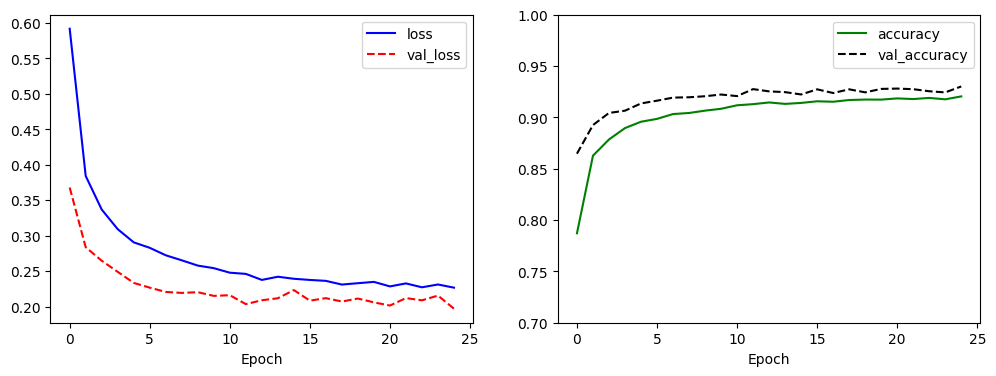

[0.21225430071353912, 0.9243000149726868]

In [23]:
# 6.13 VGGNet 스타일의 Fashion MNIST 분류 컨볼루션 신경망 모델 학습
history = model.fit(train_X, train_Y, epochs=25, validation_split=0.25)

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))
# val_loss가 증가하지 않는다
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
#정확도가 92.52%로 좋다
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

model.evaluate(test_X, test_Y, verbose=0)

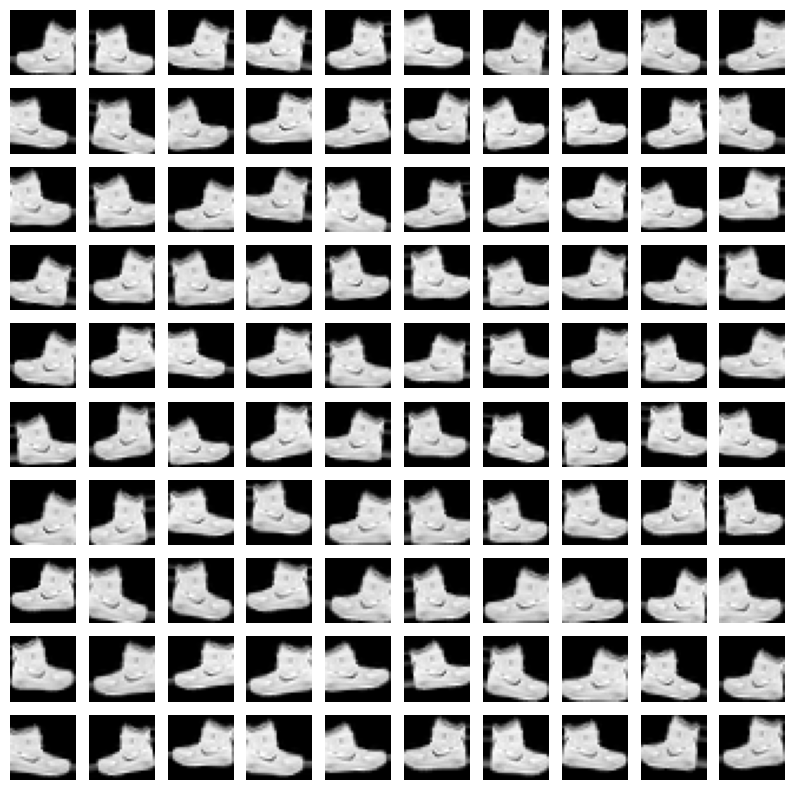

In [24]:
# 6.14 Image Augmentation 데이터 표시
# 이미지 보강은 훈련 데이터에 없는 이미지를 새롭게 만들어 훈련데이터를 보강하는 방법 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

# 이 ImageDataGenerator 코드 부분은 다음 링크에서 참조했습니다. 
# https://github.com/franneck94/MNIST-Data-Augmentation/blob/master/mnist.py
# rotation, zoom, shift, flip 등을 지정합니다.
image_generator = ImageDataGenerator( # 훈련데이터의 표현력을 더 좋게 만드는 방법
            rotation_range=10,# 회전
            zoom_range=0.10,
            shear_range=0.5,#기울이거나
            width_shift_range=0.10,# 평행이동
            height_shift_range=0.10,
            horizontal_flip=True,#이미지를 가로로 뒤집다
            vertical_flip=False) # 이미지를 세로로 뒤집다

augment_size = 100
# flow()는 실제로 보강된 이미지를 생성
x_augmented = image_generator.flow(np.tile(train_X[0].reshape(28*28),100).reshape(-1,28,28,1),
                  np.zeros(augment_size), batch_size=augment_size, shuffle=False).next()[0]

# 새롭게 생성된 이미지 표시
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for c in range(100):
    plt.subplot(10,10,c+1)
    plt.axis('off')
    plt.imshow(x_augmented[c].reshape(28,28), cmap='gray')
plt.show()

In [25]:
# 6.15 Image Augmentation
image_generator = ImageDataGenerator(
            rotation_range=10,
            zoom_range=0.10,
            shear_range=0.5,
            width_shift_range=0.10,
            height_shift_range=0.10,
            horizontal_flip=True,
            vertical_flip=False)

augment_size = 30000 #훈련 데이터의 50%인 30,000개의 이미지 추가를 위해 설정

randidx = np.random.randint(train_X.shape[0], size=augment_size) # 60,000 정수 중에서 30,000 정수를 랜덤하게 추출
# np.random.choice()로 대체 가능
# randidx는 임의 정수들의 넘파이 배열
x_augmented = train_X[randidx].copy() # 복사한다 
y_augmented = train_Y[randidx].copy()
x_augmented = image_generator.flow(x_augmented, np.zeros(augment_size), 
                      batch_size=augment_size, shuffle=False).next()[0]
print(train_X.shape)
# 원래 데이터인 x_train 에 Image Augmentation 된 x_augmented 를 추가합니다.
train_X = np.concatenate((train_X, x_augmented)) # 이미지 보강
train_Y = np.concatenate((train_Y, y_augmented))
#train_X가 여러번 반복하면 누적 증가되어 이해가 필요 
print(train_X.shape)

(60000, 28, 28, 1)
(90000, 28, 28, 1)


Epoch 1/25
2110/2110 [==============================] - 22s 9ms/step - loss: 0.5769 - accuracy: 0.7869 - val_loss: 0.5852 - val_accuracy: 0.7849
Epoch 2/25
2110/2110 [==============================] - 19s 9ms/step - loss: 0.3881 - accuracy: 0.8588 - val_loss: 0.4846 - val_accuracy: 0.8195
Epoch 3/25
2110/2110 [==============================] - 20s 9ms/step - loss: 0.3431 - accuracy: 0.8760 - val_loss: 0.4913 - val_accuracy: 0.8183
Epoch 4/25
2110/2110 [==============================] - 19s 9ms/step - loss: 0.3242 - accuracy: 0.8843 - val_loss: 0.4518 - val_accuracy: 0.8300
Epoch 5/25
2110/2110 [==============================] - 20s 9ms/step - loss: 0.3117 - accuracy: 0.8878 - val_loss: 0.4153 - val_accuracy: 0.8474
Epoch 6/25
2110/2110 [==============================] - 20s 9ms/step - loss: 0.3037 - accuracy: 0.8909 - val_loss: 0.4312 - val_accuracy: 0.8438
Epoch 7/25
2110/2110 [==============================] - 19s 9ms/step - loss: 0.2925 - accuracy: 0.8942 - val_loss: 0.4146 - val_ac

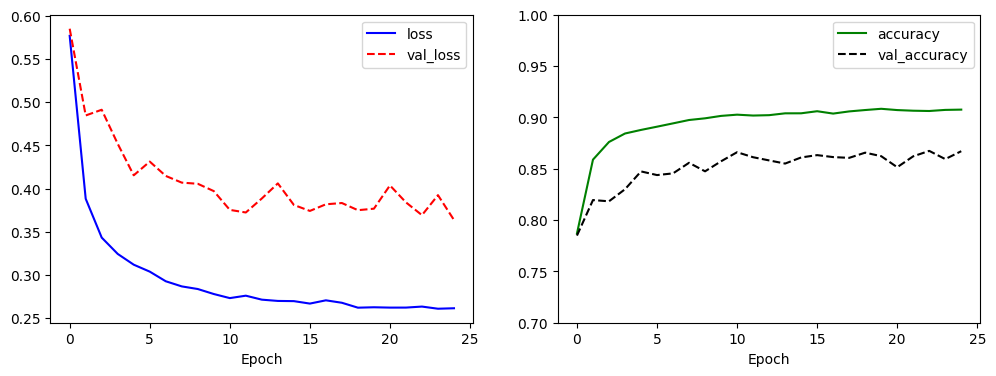

[0.21255455911159515, 0.9235000014305115]

In [26]:
# 6.16 VGGNet style 네트워크 + Image Augmentation 학습
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(28,28,1), kernel_size=(3,3), filters=32, padding='same',
                           activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=64, padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=128, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=256, padding='valid', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=512, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(units=256, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

history = model.fit(train_X, train_Y, epochs=25, validation_split=0.25)

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()
#분류 정확도가 92.88으로 92.52보다 약간 증가
model.evaluate(test_X, test_Y, verbose=0)